In [1]:
from matplotlib import font_manager
font_path = '/home/t/tomoyuki-mano1/fonts/arial.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)

### Prepare space in /flash

In [2]:
import os, subprocess

In [3]:
cwd = os.path.basename(os.getcwd())
tmpdir = os.path.join("/flash/ReiterU/tmp/", cwd, "violin")
if not os.path.exists(tmpdir):
    os.makedirs(tmpdir)

### Main

In [4]:
import pandas as pd
import numpy as np
import os, h5py
from probemapper.plot import merge_data_oct
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

In [5]:
lut = pd.read_csv("/bucket/ReiterU/DBS/atlas/O_Laqueus_v0.2/region_LUT.csv")
lut["region_name2"] = ["VL", "Others", "sFL", "iFL", "Buc", "Subfr", "aBL", "dBL", "Subv", "Prec"]
display(lut)

,ID,region_name,region_color,region_name2
0,1,Vertical Lobe,"128,174,128",VL
1,3,Others,"216,100,79",Others
2,4,Median superior frontal lobe + Lateral superio...,"216,100,79",sFL
3,5,Median inferior frontal lobe + Lateral inferio...,"255,147,114",iFL
4,6,Superior buccal lobe\n+ Posterior buccal lobe,"244,128,26",Buc
5,7,Subfrontal lobe,"251,202,0",Subfr
6,8,Anterior basal lobe,"89,114,255",aBL
7,9,Anterior dorsal basal lobe + Posterior dorsal ...,"82,145,163",dBL
8,11,Subvertical Lobe,"24,151,54",Subv
9,12,Precomissural,"255,170,255",Prec


In [6]:
data = [
    {
        "name": "L-J30",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220526_P189_laqueus_DiI_L-J30/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 0,
    },
    {
        "name": "L-F11",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220526_P190_laqueus_DiI_L-F11/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 1,
    },
    {
        "name": "L-M4",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220321_P177_laqueus_DiI_3-8_CUBIC/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 2,
    },
    {
        "name": "L-M13",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220529_P191_laqueus_DiI_LM13/analysis/indexing/channel_LUT.csv",
        "offset": 10,
        "hdf5_column": 3,
    },
    {
        "name": "L-M27",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220517_P185_laqueus_DiI_L-M27/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 4,
    },
    {
        "name": "L-A1",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220613_P200_laqueus_DiI_L-A1/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 5,
    },
    {
        "name": "L-A2",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220518_P186_laqueus_DiI_L-A2/analysis/indexing/channel_LUT.csv",
        "offset": 10,
        "hdf5_column": 6,
    },
    {
        "name": "L-A11",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220614_P201_laqueus_DiI_L-A11/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 7,
    },
    {
        "name": "L-A29",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220615_P202_laqueus_DiI_L-A29/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 8,
    }
]

In [7]:
hdf_info = [
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/asBoutOverChans150.h5",
        "key": "meanL",
        "name": "AS_low",
        "description": "Envelop intensity (a.u.) in 0.1-10 Hz band during AS"
    },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/asBoutOverChans150.h5",
        "key": "meanH",
        "name": "AS_high",
        "description": "Envelop intensity (a.u.) in 20-40 Hz band during AS"
    },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/asBoutOverChans150.h5",
        "key": "meanLQS",
        "name": "QS_low",
        "description": "Envelop intensity (a.u.) in 0.1-10 Hz band during QS"
    },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/asBoutOverChans150.h5",
        "key": "meanHQS",
        "name": "QS_high",
        "description": "Envelop intensity (a.u.) in 20-40 Hz band during QS"
    },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/wakeBoutOverChans150.h5",
        "key": "meanL",
        "name": "wake_low",
        "description": "Envelop intensity (a.u.) in 0.1-10 Hz band during wake"
    },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/wakeBoutOverChans150.h5",
        "key": "meanH",
        "name": "wake_high",
        "description": "Envelop intensity (a.u.) in 20-40 Hz band during wake"
    },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/spindleRate.h5",
        "key": "smoothedRate",
        "name": "spindle_rate",
        "description": "Spindle rate (events per min) during QS"
    },
#     {
#         "path": "/bucket/ReiterU/octopus/electrophysiology/bceBoutOverChans.h5",
#         "key": "maxBCE",
#         "name": "BCE-LFP_xcr",
#         "description": "Correlation between BCE and LFP during QS"
#     },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/vleRate.h5",
        "key": "smoothedRate",
        "name": "VLE_rate",
        "description": "VLE rate"
    },
]

In [8]:
probes = merge_data_oct(data, hdf_info, lut)

In [9]:
# remove aBL channels, since the sample size is too low
probes.drop(probes[probes["Region_name"]=="aBL"].index, inplace=True)

In [10]:
display(probes)

,channel,X,Y,Z,X_org,Y_org,Z_org,Region,Region_name,Region_color,AS_low,AS_high,QS_low,QS_high,wake_low,wake_high,spindle_rate,VLE_rate,probe
0,0,188.530,182.238,151.016,1787.73,2235.010,1369.73,7,Subfr,"[251, 202, 0]",8.031801,5.352962,5.310945,4.910202,10.110984,4.588534,0.002035,0.009922,L-J30
1,1,189.106,182.020,151.850,1790.54,2227.030,1374.33,6,Buc,"[244, 128, 26]",8.387841,5.550501,5.648776,5.406944,13.041589,4.845503,0.002358,0.009922,L-J30
2,2,189.691,181.804,152.705,1793.35,2219.050,1378.92,6,Buc,"[244, 128, 26]",8.435032,5.550501,5.743419,5.406944,14.179334,4.863403,0.002367,0.011709,L-J30
3,3,190.277,181.584,153.564,1796.16,2211.070,1383.52,6,Buc,"[244, 128, 26]",8.993790,5.369701,5.644291,4.921538,15.057707,4.723267,0.002367,0.011709,L-J30
4,4,190.866,181.371,154.449,1798.97,2203.080,1388.11,6,Buc,"[244, 128, 26]",8.471179,5.293127,5.703934,4.814057,19.834855,4.694675,0.002619,0.014387,L-J30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,182,242.226,151.987,424.261,1992.10,478.734,2870.82,1,VL,"[128, 174, 128]",10.184767,3.927582,6.648152,3.791308,13.796522,3.965979,0.001230,0.006667,L-A29
1964,183,242.312,151.292,425.283,1991.75,469.050,2873.30,1,VL,"[128, 174, 128]",9.585992,3.805563,6.648152,3.684484,13.507777,3.876493,0.001230,0.005833,L-A29
1965,184,242.384,150.592,426.303,1991.21,459.367,2875.72,1,VL,"[128, 174, 128]",9.398674,4.018981,6.356279,3.936605,15.017045,4.075801,0.001230,0.005833,L-A29
1966,185,242.443,149.871,427.341,1990.49,449.684,2878.09,1,VL,"[128, 174, 128]",8.582735,3.805563,5.984127,3.684484,12.771406,3.875377,0.001230,0.003333,L-A29


In [11]:
df1 = probes[["Region_name", "AS_high", "AS_low", "probe"]]
df1.rename({"AS_high": "high", "AS_low": "low"}, axis=1, inplace=True)
df1["label"] = ["AS"]*df1.shape[0]
df2 = probes[["Region_name", "wake_high", "wake_low", "probe"]]
df2.rename({"wake_high": "high", "wake_low": "low"}, axis=1, inplace=True)
df2["label"] = ["wake"]*df2.shape[0]
df3 = probes[["Region_name", "QS_high", "QS_low", "probe"]]
df3.rename({"QS_high": "high", "QS_low": "low"}, axis=1, inplace=True)
df3["label"] = ["QS"]*df3.shape[0]

df = pd.concat([df1, df3, df2])
display(df)

/home/t/tomoyuki-mano1/projects/dbs/python_envs/mayavi/.env/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/t/tomoyuki-mano1/projects/dbs/python_envs/mayavi/.env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/t/tomoyuki-mano1/projects/dbs/python_envs/mayavi/.env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is tryin

,Region_name,high,low,probe,label
0,Subfr,5.352962,8.031801,L-J30,AS
1,Buc,5.550501,8.387841,L-J30,AS
2,Buc,5.550501,8.435032,L-J30,AS
3,Buc,5.369701,8.993790,L-J30,AS
4,Buc,5.293127,8.471179,L-J30,AS
...,...,...,...,...,...
1963,VL,3.965979,13.796522,L-A29,wake
1964,VL,3.876493,13.507777,L-A29,wake
1965,VL,4.075801,15.017045,L-A29,wake
1966,VL,3.875377,12.771406,L-A29,wake


### Plot!

In [13]:
palette2 = ["#EC2426", "#F58F92", "#FDE9E9"]
order = ["VL", "Subv", "sFL", "iFL", "Subfr", "Buc", "dBL"]

In [14]:
mpl.rcParams.update({
    'font.size': 21,
    'font.family': 'sans-serif',
    'font.sans-serif': "Arial",
    'pdf.fonttype': 42,
    'ps.fonttype': 42})

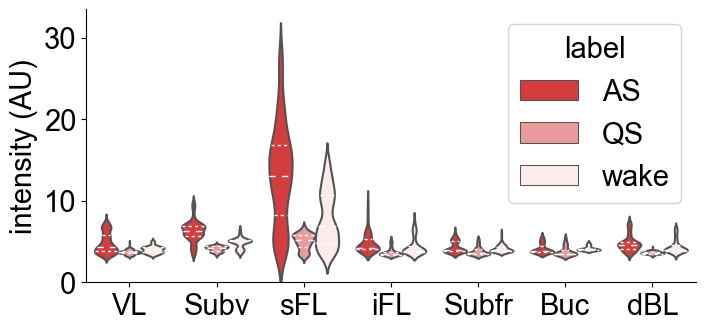

In [15]:
fig, ax = plt.subplots(figsize=(200/25.4,90/25.4))
violin = sns.violinplot(x="Region_name", y="high", hue="label", data=df, ax=ax, scale="width",
                        inner="quartile", order=order, palette=palette2)

for p in violin.lines:
    p.set_linewidth(1.0)
    p.set_color('white')

#ax.set_title("20-40 Hz")
ax.set_ylabel("intensity (AU)")
ax.set_xlabel("")
# for i in range(len(order)):
#     ax.get_xticklabels()[i].set_color(p[i])
ax.set_ylim(bottom=0)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig(os.path.join(tmpdir, "violin_highfreq.pdf"), bbox_inches='tight')
plt.show()

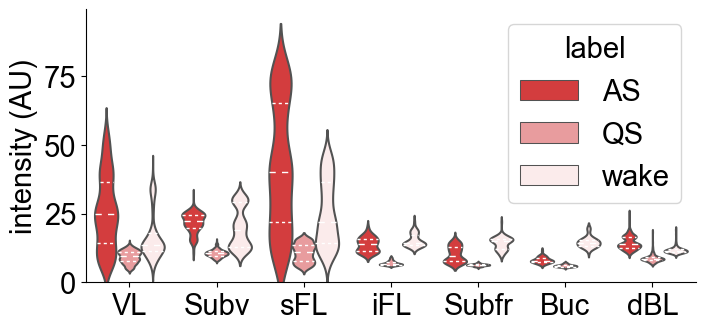

In [16]:
fig, ax = plt.subplots(figsize=(200/25.4,90/25.4))
violin = sns.violinplot(x="Region_name", y="low", hue="label", data=df, ax=ax, scale="width",
                        inner="quartile", order=order, palette=palette2)

for p in violin.lines:
    p.set_linewidth(1)
    p.set_color('white')
    
#ax.set_title("0.1-10 Hz")
ax.set_ylabel("intensity (AU)")
ax.set_xlabel("")
# for i in range(len(order)):
#     ax.get_xticklabels()[i].set_color(p[i])
ax.set_ylim(bottom=0)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig(os.path.join(tmpdir, "violin_lowfreq.pdf"), bbox_inches='tight')
plt.show()

### Save to bucket

In [19]:
resultdir = "/bucket/ReiterU/DBS/analysis/230123_octopus_AS_QS_wake_figures"
if not os.path.exists(resultdir):
    subprocess.run(["ssh", "deigo", "mkdir", resultdir])

In [20]:
subprocess.run(["scp", "-r", tmpdir, f"deigo:{resultdir}"])

CompletedProcess(args=['scp', '-r', '/flash/ReiterU/tmp/230123_neuropixel_3D_plot_remake/violin', 'deigo:/bucket/ReiterU/DBS/analysis/230123_octopus_AS_QS_wake_figures'], returncode=0)